In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import fbprophet
from fbprophet import Prophet

In [4]:
import quandl
quandl.ApiConfig.api_key = 'eA4C8EnyPVcPFbWEsaLy'

DATA_PATH = "data"

In [19]:
def get_price_data(exchange, ticker) :
    price_quandl_id = f'{exchange}/{ticker}'
    price_data_path = f'{DATA_PATH}/quandl.com/{price_quandl_id}.csv'
    
    # Load local copy
    try :
        price_data = pd.read_csv(price_data_path)
        price_data.set_index('Date', inplace=True)
        # FIXME check if up to date, if not update and save
    except :
        print(f'Could not read file: {price_data_path}. Downloading {price_quandl_id} from quandl.com...')
        price_data = quandl.get(f'{exchange}/{ticker}')
        price_data.to_csv(price_data_path)
    
    return price_data

In [20]:
price_data = get_price_data('LBMA','GOLD')

In [21]:
price_data[-10:]

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2018-02-06,1344.65,1331.40,962.50,959.67,1083.52,1079.63
2018-02-07,1328.50,1324.65,956.12,950.44,1075.95,1073.36
2018-02-08,1311.05,1315.45,944.87,937.00,1071.13,1071.57
2018-02-09,1316.05,1314.10,945.58,951.54,1072.84,1072.17
2018-02-12,1321.70,1322.30,955.19,956.16,1077.45,1078.07
2018-02-13,1329.40,1325.35,955.04,953.46,1077.61,1071.55
2018-02-14,1330.75,1336.25,959.74,964.64,1077.77,1083.83
2018-02-15,1353.70,1352.45,962.21,959.56,1084.45,1082.10
2018-02-16,1358.60,1352.10,964.61,963.51,1086.47,1087.22


In [22]:
# Select column to use
fbp_data = DataFrame(price_data['USD (PM)'])

# Set up df to match what Prophet expects
fbp_data = fbp_data.reset_index()
fbp_data.columns = ['ds','y']

fbp_data.tail()

,ds,y
12667,2018-02-13,1325.35
12668,2018-02-14,1336.25
12669,2018-02-15,1352.45
12670,2018-02-16,1352.10
12671,2018-02-19,1346.60


In [23]:
fbp_model = Prophet()
fbp_model.fit(fbp_data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\matth\AppData\Local\conda\conda\envs\fastai\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
future = fbp_model.make_future_dataframe(periods=365)
future.tail()

,ds
13032,2019-02-15
13033,2019-02-16
13034,2019-02-17
13035,2019-02-18
13036,2019-02-19


In [26]:
forecast = fbp_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
13032,2019-02-15,1446.700517,1430.143843,1462.666523,1299.641432,1611.186429,6.563062,6.563062,6.563062,6.563062,6.563062,6.563062,-1.308557,-1.308557,-1.308557,7.871619,7.871619,7.871619,1453.263579
13033,2019-02-16,1446.788161,1430.095203,1462.994816,1300.854829,1607.502237,11.495067,11.495067,11.495067,11.495067,11.495067,11.495067,3.333187,3.333187,3.333187,8.161880,8.161880,8.161880,1458.283228
13034,2019-02-17,1446.875806,1430.001162,1463.323110,1306.811341,1607.588053,11.766193,11.766193,11.766193,11.766193,11.766193,11.766193,3.333192,3.333192,3.333192,8.433001,8.433001,8.433001,1458.641998
13035,2019-02-18,1446.963450,1429.967002,1463.623752,1299.617042,1599.749256,7.118379,7.118379,7.118379,7.118379,7.118379,7.118379,-1.559161,-1.559161,-1.559161,8.677540,8.677540,8.677540,1454.081829
13036,2019-02-19,1447.051095,1429.944223,1463.810150,1309.438301,1614.554482,7.114211,7.114211,7.114211,7.114211,7.114211,7.114211,-1.774297,-1.774297,-1.774297,8.888508,8.888508,8.888508,1454.165306


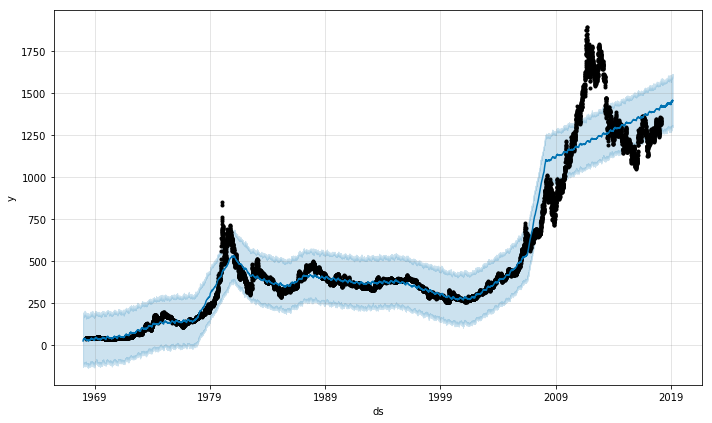

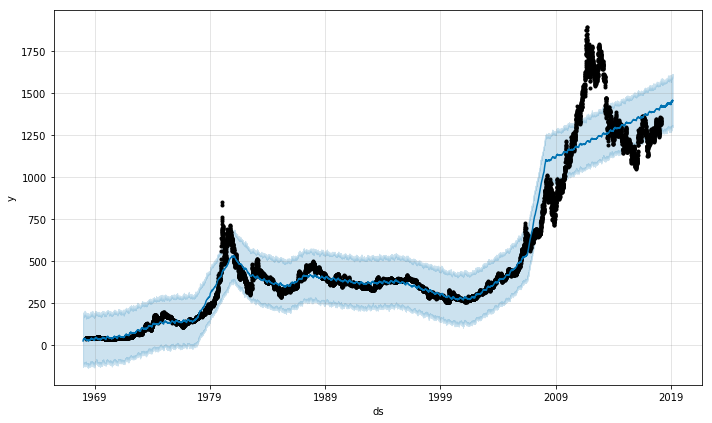

In [32]:
fbp_model.plot(forecast)